In [1]:
from pathlib import Path

import pandas as pd

from sage.xai.atlas_overlap import project_to_atlas
from sage.xai.atlas import get_atlas

atlas = get_atlas("dkt")

RESULT = pd.read_csv("./assets/mask_single_occlusion.csv")

result = RESULT.drop_duplicates(subset="index")
result = result.dropna()
result["index"] = result["index"].apply(atlas.get_roi_name)
result.columns = map(str.strip, result.columns)

xai_dict = result[["index", "r2"]].set_index("index")["r2"].to_dict()

INFO:/home/1phantasmas/brain-age-prediction/sage/xai/atlas.py:Load dkt atlas.


In [2]:
result.head()

,index,mse,mae,r2
0,Left-Inf-Lat-Vent,9.388,2.410,0.8392
1,ctx-lh-paracentral,9.104,2.401,0.8441
2,Left-Cerebellum-White-Matter,9.017,2.378,0.8455
3,ctx-lh-parsopercularis,12.195,2.847,0.7843
4,Right-Putamen,8.716,2.351,0.8507


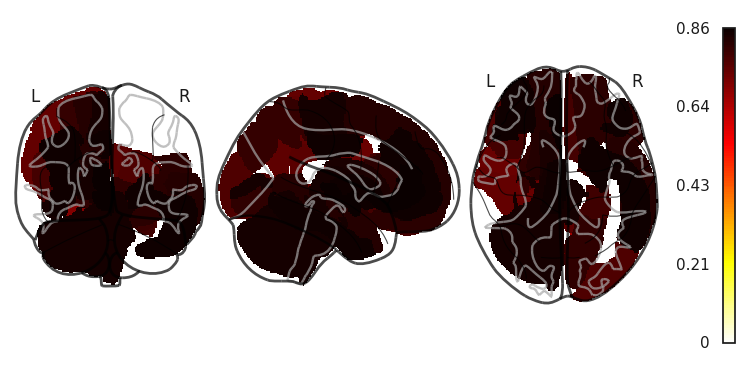

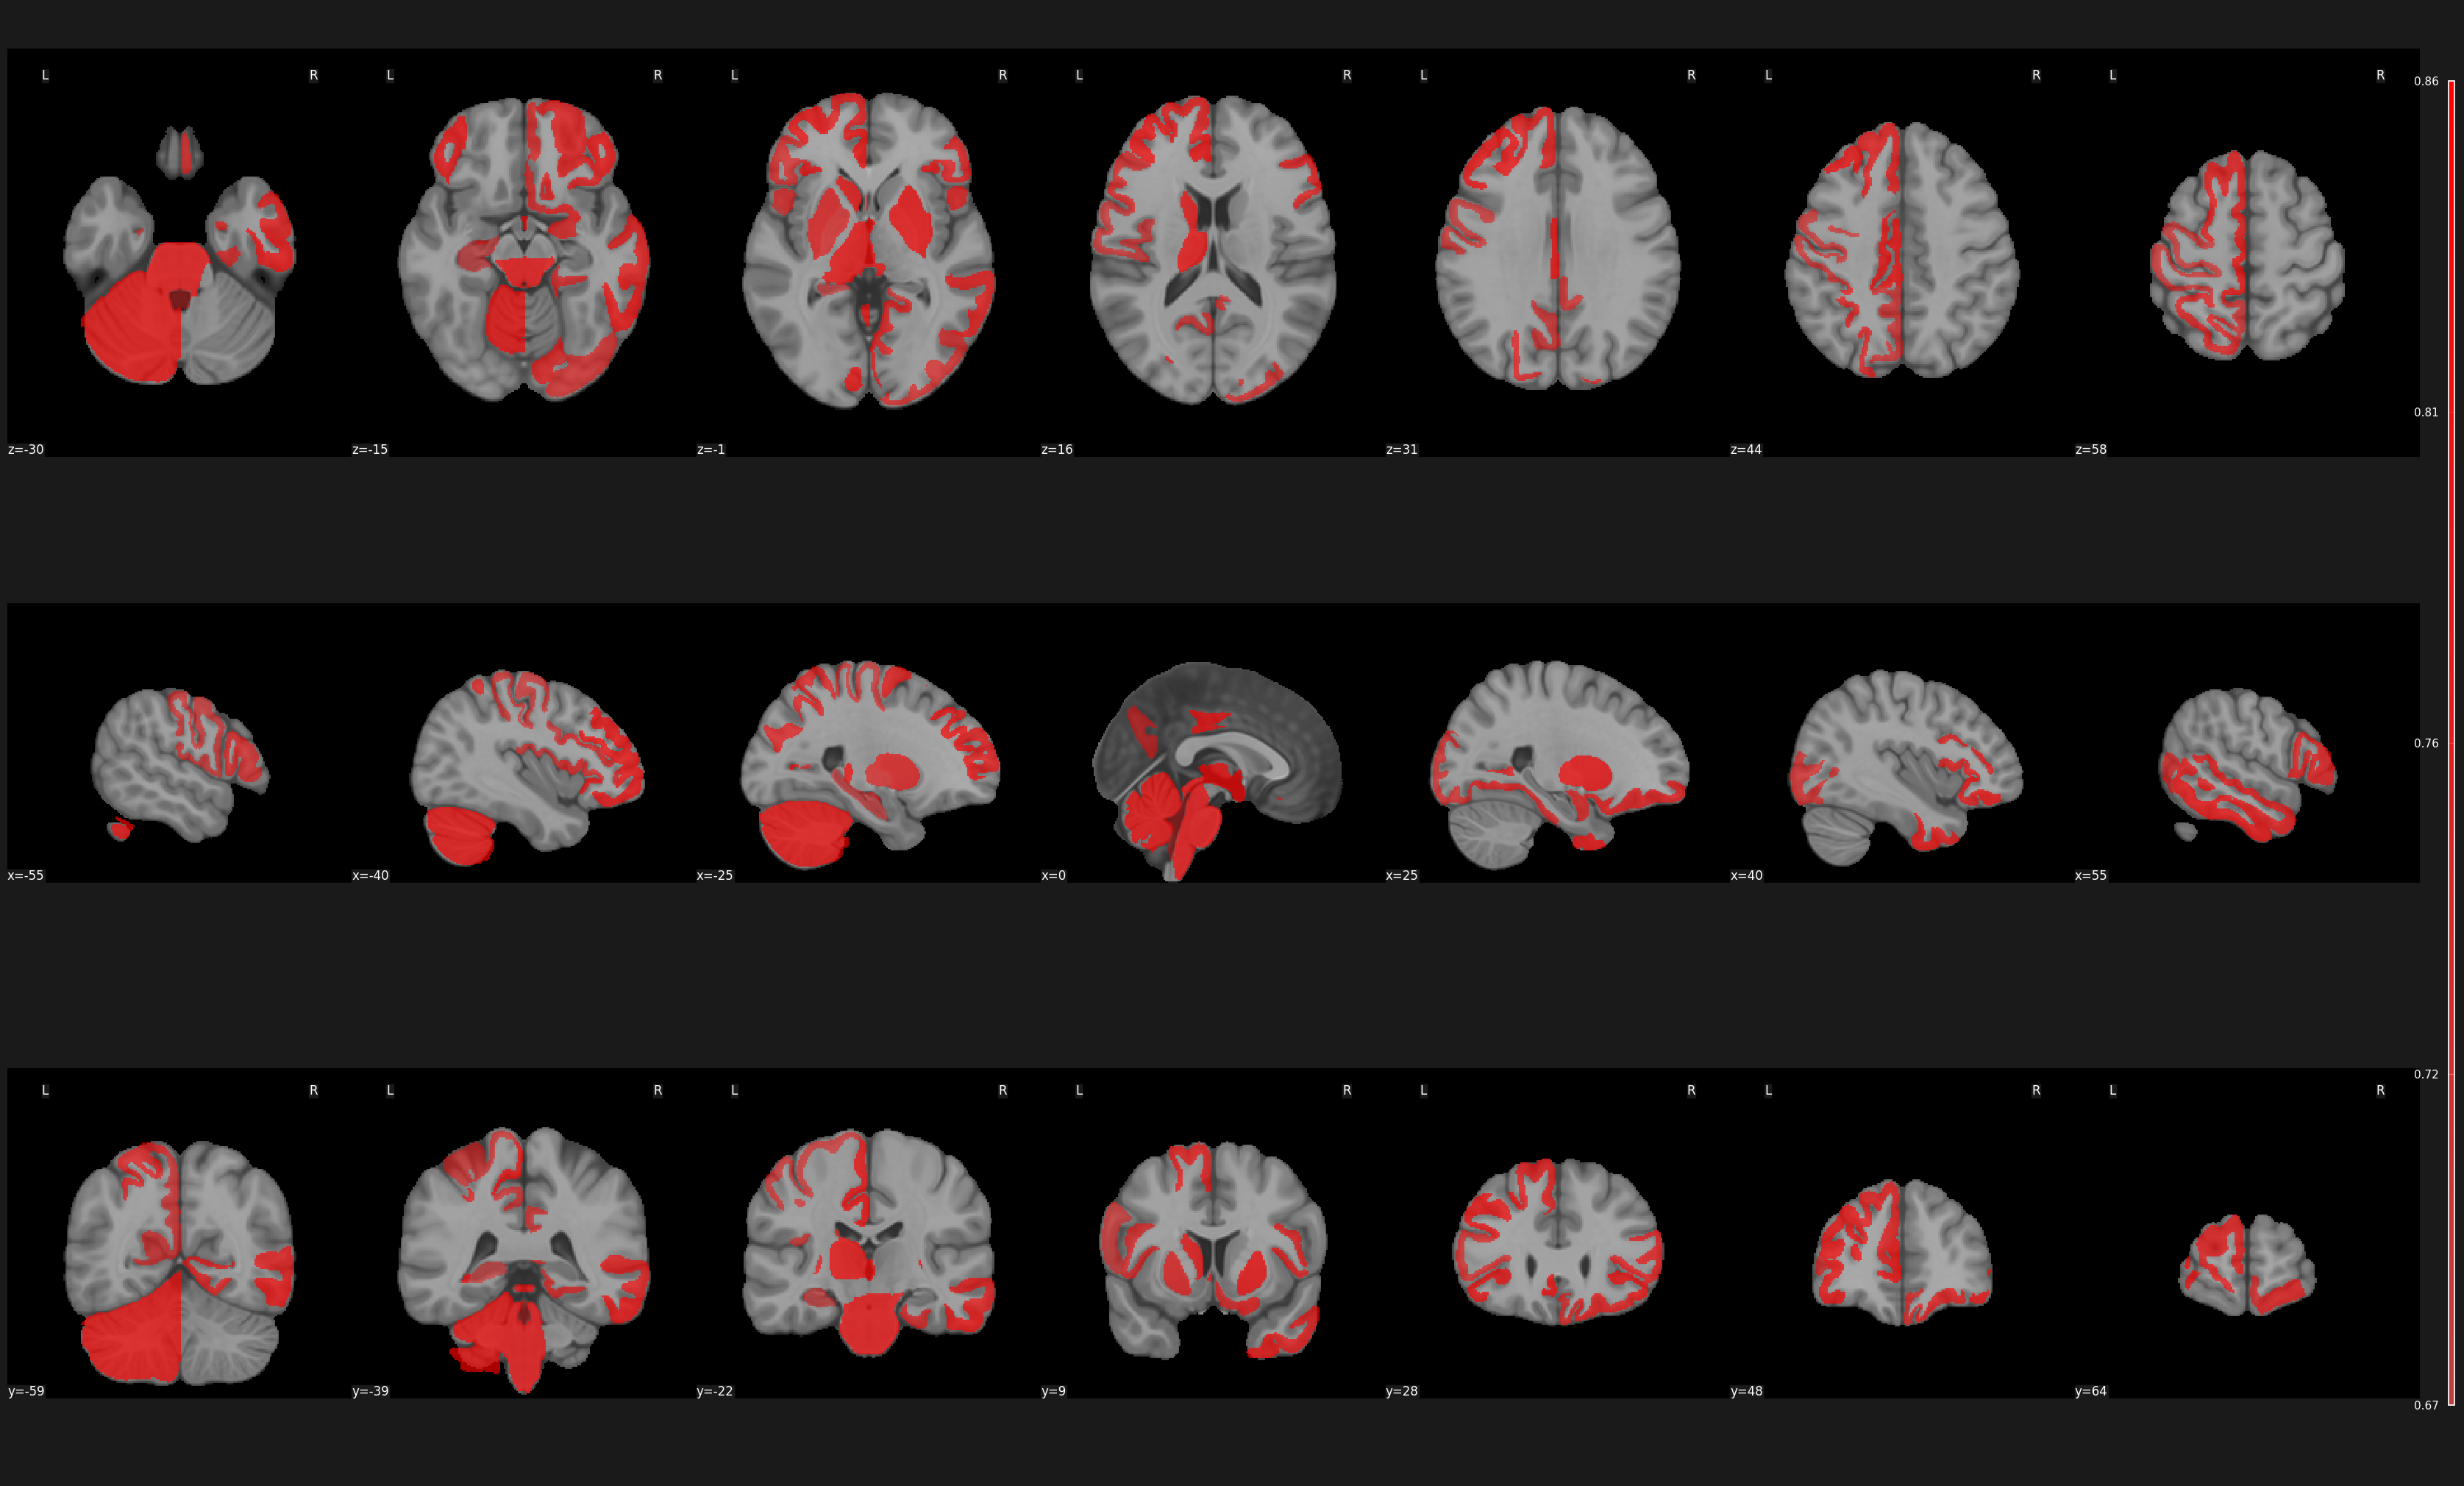

In [3]:
project_to_atlas(atlas=atlas, xai_dict=xai_dict, vmin=0.75);